In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [2]:
df=pd.read_csv("players_21.csv")
df.head(4)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     200389  https://sofifa.com/player/200389/jan-oblak/210002   
3     188545  https://sofifa.com/player/188545/robert-lewand...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
2           J. Oblak                            Jan Oblak   27  1993-01-07   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   

   height_cm  weight_kg nationality          club_name  \
0        170         72   Argentina       FC Barcelona   
1        187         83    Portugal           Juventus   
2        188         87    Slovenia    Atlético Madrid   
3        184         80      Poland  FC Bayern München   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
2  Spain Primera Division          1.0       91         93   75000000   
3    German 1. Bundesliga          1.0       91         91   80000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
2    125000               GK          Right                         3   
3    240000               ST          Right                         4   

   weak_foot  skill_moves      work_rate             body_type real_face  \
0          4            4     Medium/Low                 Messi       Yes   
1          4            5       High/Low            C. Ronaldo       Yes   
2          3            1  Medium/Medium  PLAYER_BODY_TYPE_259       Yes   
3          4            4    High/Medium  PLAYER_BODY_TYPE_276       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
2         159400000.0                                                NaN   
3         132000000.0              #Distance Shooter, #Clinical Finisher   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
2            GK                13.0         NaN  2014-07-16   
3            ST                 9.0         NaN  2014-07-01   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
2                2023.0              GK                   1.0   NaN       NaN   
3                2023.0             NaN                   NaN  78.0      91.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0    65.0        NaN          NaN         NaN   
1     81.0       89.0       35.0    77.0        NaN          NaN         NaN   
2      NaN        NaN        NaN     NaN       87.0         92.0        78.0   
3     78.0       85.0       43.0    82.0        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  \
0          NaN       NaN             NaN   
1          NaN       NaN             NaN   
2         90.0      52.0            90.0   
3          NaN       NaN             NaN   

                                       player_traits  attacking_crossing  \
0  Finesse Shot, Long Shot Taker (AI), Speed Drib...                  8

In [3]:
df.tail(4)

sofifa_id                                         player_url  \
18940     257710  https://sofifa.com/player/257710/mengxuan-zhan...   
18941     250989  https://sofifa.com/player/250989/zhenghao-wang...   
18942     257697  https://sofifa.com/player/257697/zitong-chen/2...   
18943     257936   https://sofifa.com/player/257936/yue-song/210002   

           short_name       long_name  age         dob  height_cm  weight_kg  \
18940  Zhang Mengxuan  Mengxuan Zhang   21  1999-04-26        177         70   
18941   Wang Zhenghao             王政豪   20  2000-06-28        185         74   
18942     Chen Zitong     Zitong Chen   23  1997-02-20        186         80   
18943        Song Yue        Yue Song   28  1991-11-20        185         79   

      nationality                            club_name           league_name  \
18940    China PR  Chongqing Dangdai Lifan FC SWM Team  Chinese Super League   
18941    China PR                      Tianjin TEDA FC  Chinese Super League   
18942    China PR        Shijiazhuang Ever Bright F.C.  Chinese Super League   
18943    China PR                      Tianjin TEDA FC  Chinese Super League   

       league_rank  overall  potential  value_eur  wage_eur player_positions  \
18940          1.0       47         52      35000      1000               CB   
18941          1.0       47         51      35000      1000               CB   
18942          1.0       47         51      40000      1000               CM   
18943          1.0       47         47      30000      2000               CM   

      preferred_foot  international_reputation  weak_foot  skill_moves  \
18940          Right                         1          2            2   
18941          Right                         1          2            2   
18942          Right                         1          2            2   
18943          Right                         1          2            2   

        work_rate body_type real_face  release_clause_eur player_tags  \
18940     Low/Low    Normal        No             57000.0         NaN   
18941  Low/Medium    Normal        No             57000.0         NaN   
18942     Low/Low      Lean        No             65000.0         NaN   
18943     Low/Low      Lean        No             47000.0         NaN   

      team_position  team_jersey_number loaned_from      joined  \
18940           SUB                25.0         NaN  2020-08-01   
18941           RES                 2.0         NaN  2019-02-01   
18942           RDM                 4.0         NaN  2020-08-01   
18943           RES                33.0         NaN  2020-08-01   

       contract_valid_until nation_position  nation_jersey_number  pace  \
18940                2020.0             NaN                   NaN  58.0   
18941                2022.0             NaN                   NaN  51.0   
18942                2023.0             NaN                   NaN  61.0   
18943                2022.0             NaN                   NaN  65.0   

       shooting  passing  dribbling  defending  physic  gk_diving  \
18940      23.0     26.0       27.0       50.0    48.0        NaN   
18941      25.0     29.0       36.0       45.0    55.0        NaN   
18942      35.0     48.0       48.0       44.0    58.0        NaN   
18943      37.0     49.0       46.0       40.0    59.0        NaN   

       gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
18940          NaN         NaN          NaN       NaN             NaN   
18941          NaN         NaN          NaN       NaN             NaN   
18942          NaN         NaN          NaN       NaN             NaN   
18943          NaN         NaN          NaN       NaN             NaN   

      player_traits  attacking_crossing  attacking_finishing  \
18940           NaN                  23                   16   
18941           NaN                  20                   20   
18942           NaN                  38                   32   
18943           NaN            

In [4]:
df.shape

(18944, 106)

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 106 columns):
 #    Column                      Non-Null Count  Dtype  
---   ------                      --------------  -----  
 0    sofifa_id                   18944 non-null  int64  
 1    player_url                  18944 non-null  object 
 2    short_name                  18944 non-null  object 
 3    long_name                   18944 non-null  object 
 4    age                         18944 non-null  int64  
 5    dob                         18944 non-null  object 
 6    height_cm                   18944 non-null  int64  
 7    weight_kg                   18944 non-null  int64  
 8    nationality                 18944 non-null  object 
 9    club_name                   18719 non-null  object 
 10   league_name                 18719 non-null  object 
 11   league_rank                 18719 non-null  float64
 12   overall                     18944 non-null  int64  
 13   potential     

In [6]:
df.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club_name                       225
league_name                     225
league_rank                     225
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur              995
player_tags                   17536
team_position                   225
team_jersey_number          

<AxesSubplot:>

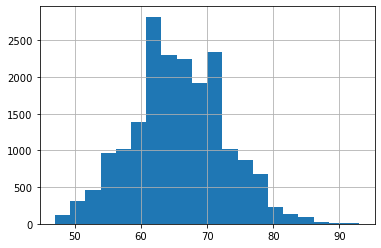

In [7]:
df['overall'].hist(bins = 20)

In [8]:
best_players_per_position=df.iloc[df.groupby(df['team_position'])['overall'].idxmax()][['team_position','short_name','overall']]
best_players_per_position.sort_values('overall', ascending=False)

team_position           short_name  overall
0             CAM             L. Messi       93
1              LS    Cristiano Ronaldo       92
2              GK             J. Oblak       91
3              ST       R. Lewandowski       91
5             RCM         K. De Bruyne       91
4              LW            Neymar Jr       91
8             LCB          V. van Dijk       90
11             RW             M. Salah       90
13            SUB            S. Agüero       89
17            CDM             Casemiro       89
15             CF           K. Benzema       89
24            LCM             T. Kroos       88
22             RS            P. Dybala       88
20            RDM           J. Kimmich       88
33             LB         A. Robertson       87
29             RB  T. Alexander-Arnold       87
46             LM               H. Son       87
48            RCB            R. Varane       86
55             CB           M. Hummels       86
51             LF             A. Gómez       86
62             RM           K. Havertz       85
136            RF            J. Iličić       84
104           LDM          L. Goretzka       84
166           RES          Juan Bernat       83
300           LWB                Jonny       81
355            CM         I. Fernández       81
382           RWB      Héctor Bellerín       80
378           LAM            C. Nkunku       80
509           RAM            Dani Olmo       79

In [9]:
pd.DataFrame(df.team_position.value_counts().sort_index())

team_position
CAM            286
CB             128
CDM            181
CF              13
CM              76
GK             681
LAM             25
LB             553
LCB            681
LCM            425
LDM            248
LF              13
LM             420
LS             224
LW             170
LWB             78
RAM             25
RB             553
RCB            681
RCM            425
RDM            248
RES           3163
RF              13
RM             420
RS             224
RW             170
RWB             78
ST             452
SUB           8065

### Feature engineering
Para analizar mejor los datos, agruparemos las posiciones de los jugadores en posiciones mas claras, como defensa, mediocampo y ataque.

Por otro lado, existen 225 registros sin aclarar la posición de juego. Por ahora, descartaremos esos datos.

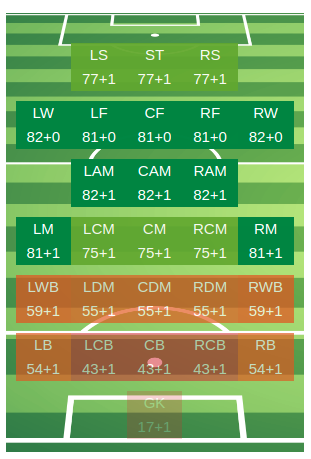

In [10]:
position_map = {
 'CAM': 'Midfield',
 'LS': 'Attack',
 'GK': 'Goalkeeper',
 'ST': 'Attack',
 'LW': 'Attack',
 'RCM': 'Midfield',
 'LCB': 'Defense',
 'RW': 'Attack',
 'SUB': 'Defense',
 'CF': 'Attack',
 'CDM': 'Defense',
 'RDM': 'Defense',
 'RS': 'Attack',
 'LCM': 'Midfield',
 'RB': 'Defense',
 'LB': 'Defense',
 'LM': 'Midfield',
 'RCB': 'Defense',
 'LF': 'Attack',
 'CB': 'Defense',
 'RM': 'Midfield',
 'LDM': 'Defense',
 'RF': 'Attack',
 'RES': 'Attack',
 'LWB': 'Defense',
 'CM': 'Midfield',
 'LAM': 'Midfield',
 'RWB': 'Defense',
 'RAM': 'Midfield',
}

position_colors = {
    "Defense": 4,
    "Midfield": 5,
    "Attack": 6
}

df = df.drop(df[df["team_position"].isnull()].index)
df["player_position"] = df.team_position.map(position_map)

## Análisis exploratorio de los datos

El dataset presenta una serie de habilidades (_skills_) de jugadores de fútbol según el sitio https://sofifa.com.
No conocemos exactamente cómo estos valores son calculados o extraidos.

De las columnas, podemos identificar un conjunto que contiene información personal del jugador, como nombre, edad, salario, etc.

Existe un conjunto de columnas específicas de las habilidades del jugador, como por ejemplo `attacking_finishing` o `skill_ball_control`.

Finalmente hay un tercer grupo de columnas que da un puntaje sobre la capacidad del jugador de jugar en una determinada posición (`ls`, `cam`, `rcb`).

Analizando los valores nulos en el conjunto de columnas de _skills_ encontramos que los nulos corresponden principalmente a los arqueros, que no tienen definidas "habilidades de campo", salvo por algunos ejemplos de arqueros conocidos por su juego fuera del área, como el alemán Neuer por ejemplo.

Para análisis posteriores, decidimos excluir a los arqueros y las características específicas, ya que conforman un grupo que debe analizarse por separado.

In [11]:
club_avg_overall=df.groupby("club_name")["overall"].mean().reset_index().sort_values("overall",ascending=False)
club_avg_overall.head(8)

club_name    overall
216  FC Bayern München  81.045455
489        Real Madrid  79.250000
131            Chelsea  79.212121
214       FC Barcelona  78.909091
374          Liverpool  78.575758
330              Inter  78.000000
387  Manchester United  77.818182
386    Manchester City  77.484848

In [12]:
df_overall = df[df["overall"]> 70]  # diferenciamos a los mejores jugadores
df_overall = df_overall.drop(df_overall[df["player_position"]=="Goalkeeper"].index)
df_overall.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     188545  https://sofifa.com/player/188545/robert-lewand...   
4     190871  https://sofifa.com/player/190871/neymar-da-sil...   
5     192985  https://sofifa.com/player/192985/kevin-de-bruy...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   33  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   35  1985-02-05   
3     R. Lewandowski                   Robert Lewandowski   31  1988-08-21   
4          Neymar Jr        Neymar da Silva Santos Júnior   28  1992-02-05   
5       K. De Bruyne                      Kevin De Bruyne   29  1991-06-28   

   height_cm  weight_kg nationality            club_name  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
3        184         80      Poland    FC Bayern München   
4        175         68      Brazil  Paris Saint-Germain   
5        181         70     Belgium      Manchester City   

              league_name  league_rank  overall  potential  value_eur  \
0  Spain Primera Division          1.0       93         93   67500000   
1         Italian Serie A          1.0       92         92   46000000   
3    German 1. Bundesliga          1.0       91         91   80000000   
4          French Ligue 1          1.0       91         91   90000000   
5  English Premier League          1.0       91         91   87000000   

   wage_eur player_positions preferred_foot  international_reputation  \
0    560000       RW, ST, CF           Left                         5   
1    220000           ST, LW          Right                         5   
3    240000               ST          Right                         4   
4    270000          LW, CAM          Right                         5   
5    370000          CAM, CM          Right                         4   

   weak_foot  skill_moves    work_rate             body_type real_face  \
0          4            4   Medium/Low                 Messi       Yes   
1          4            5     High/Low            C. Ronaldo       Yes   
3          4            4  High/Medium  PLAYER_BODY_TYPE_276       Yes   
4          5            5  High/Medium                Neymar       Yes   
5          5            4    High/High  PLAYER_BODY_TYPE_321       Yes   

   release_clause_eur                                        player_tags  \
0         138400000.0  #Dribbler, #Distance Shooter, #FK Specialist, ...   
1          75900000.0  #Aerial Threat, #Dribbler, #Distance Shooter, ...   
3         132000000.0              #Distance Shooter, #Clinical Finisher   
4         166500000.0  #Speedster, #Dribbler, #Playmaker, #FK Special...   
5         161000000.0  #Dribbler, #Playmaker, #Engine, #Distance Shoo...   

  team_position  team_jersey_number loaned_from      joined  \
0           CAM                10.0         NaN  2004-07-01   
1            LS                 7.0         NaN  2018-07-10   
3            ST                 9.0         NaN  2014-07-01   
4            LW                10.0         NaN  2017-08-03   
5           RCM                17.0         NaN  2015-08-30   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2021.0              RW                  10.0  85.0      92.0   
1                2022.0              LS                   7.0  89.0      93.0   
3                2023.0             NaN                   NaN  78.0      91.0   
4                2022.0             NaN                   NaN  91.0      85.0   
5                2023.0             RCM                   7.0  76.0      86.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     91.0       95.0       38.0    65.0    

In [13]:
df_overall.shape

(4130, 107)

In [14]:
gk_skills = ['gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']

skills_ratings = ['long_name', 'team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle']
print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

37 variables numéricas de desempeño según habilidad


In [15]:
df_skills_dirty = df_overall[skills_ratings]

In [16]:
df_skills_dirty.isnull().sum()

long_name                        0
team_position                    0
pace                           140
shooting                       140
passing                        140
dribbling                      140
defending                      140
physic                         140
attacking_crossing               0
attacking_finishing              0
attacking_heading_accuracy       0
attacking_short_passing          0
attacking_volleys                0
skill_dribbling                  0
skill_curve                      0
skill_fk_accuracy                0
skill_long_passing               0
skill_ball_control               0
movement_acceleration            0
movement_sprint_speed            0
movement_agility                 0
movement_reactions               0
movement_balance                 0
power_shot_power                 0
power_jumping                    0
power_stamina                    0
power_strength                   0
power_long_shots                 0
mentality_aggression

In [17]:
df_skills_dirty[df_skills_dirty["pace"].isnull()].head()

long_name team_position  pace  shooting  passing  dribbling  \
217       Alphonse Areola           SUB   NaN       NaN      NaN        NaN   
239      Gianluigi Buffon           SUB   NaN       NaN      NaN        NaN   
245  Sergio Asenjo Andrés           SUB   NaN       NaN      NaN        NaN   
257  Norberto Murara Neto           SUB   NaN       NaN      NaN        NaN   
323      Stéphane Ruffier           RES   NaN       NaN      NaN        NaN   

     defending  physic  attacking_crossing  attacking_finishing  \
217        NaN     NaN                  20                   19   
239        NaN     NaN                  13                   15   
245        NaN     NaN                  24                   14   
257        NaN     NaN                  11                   15   
323        NaN     NaN                  11                   11   

     attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
217                          14                       48                 16   
239                          13                       37                 17   
245                          13                       39                 15   
257                          14                       36                 12   
323                          12                       33                 13   

     skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
217               12           16                 16                  37   
239               26           20                 13                  35   
245               15           23                 22                  39   
257               19           12                 13                  41   
323               12           17                 12                  34   

     skill_ball_control  movement_acceleration  movement_sprint_speed  \
217                  22                     56                     54   
239                  28                     37                     30   
245                  14                     59                     54   
257                  24                     56                     52   
323                  15                     45                     50   

     movement_agility  movement_reactions  movement_balance  power_shot_power  \
217                58                  79                58                60   
239                55                  80                49                56   
245                62                  79                58                58   
257                59                  78                49                59   
323                51                  78                55                56   

     power_jumping  power_stamina  power_strength  power_long_shots  \
217             72             38              80                14   
239             71             34              69                13   
245             73             41              73                13   
257             83             41              63                20   
323             72             37              76                11   

     mentality_aggression  mentality_interceptions  mentality_positioning  \
217                    26                       23                     17   
239                    38                       28                     12   
245                    20                       22                     12   
257                    40                       15                     11   
323                    31                       25                     12   

     mentality_vision  mentality_penalties  mentality_composure  \
217                51                   25                   64   
239                50                   22                   70   
245                46                   15                   64   
257                42                   22                   64   
323                49                   25             

In [18]:
df_skills = df_skills_dirty.drop(labels=["long_name", "team_position"], axis=1)
df_skills = df_skills.dropna(axis='columns')
df_skills.head(4)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  84                   95                          90   
3                  71                   94                          85   
4                  85                   87                          62   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       82                 86               88           81   
3                       84                 89               85           79   
4                       87                 87               95           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 76                  77                  92   
3                 85                  70                  88   
4                 89                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     87                     91                87   
3                     77                     78                77   
4                     94                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  95                71                94             95   
3                  93                82                89             84   
4                  91                83                80             62   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             84              78                93                    63   
3             76              86                85                    81   
4             81              50                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       29                     95                82   
3                       49                     94                79   
4                       36                     87                90   

   mentality_penalties  mentality_composure  defending_standing_tackle  \
0                   75                   96                         35   
1                   84                   95                         32   
3                   88                   88                         42   
4                   92                   93                         30   

   defending_sliding_tackle  
0                        24  
1                        24  
3                        19  
4                        29

In [19]:
len(df_skills.columns)

28

In [20]:
corr_mat = df_skills.corr()

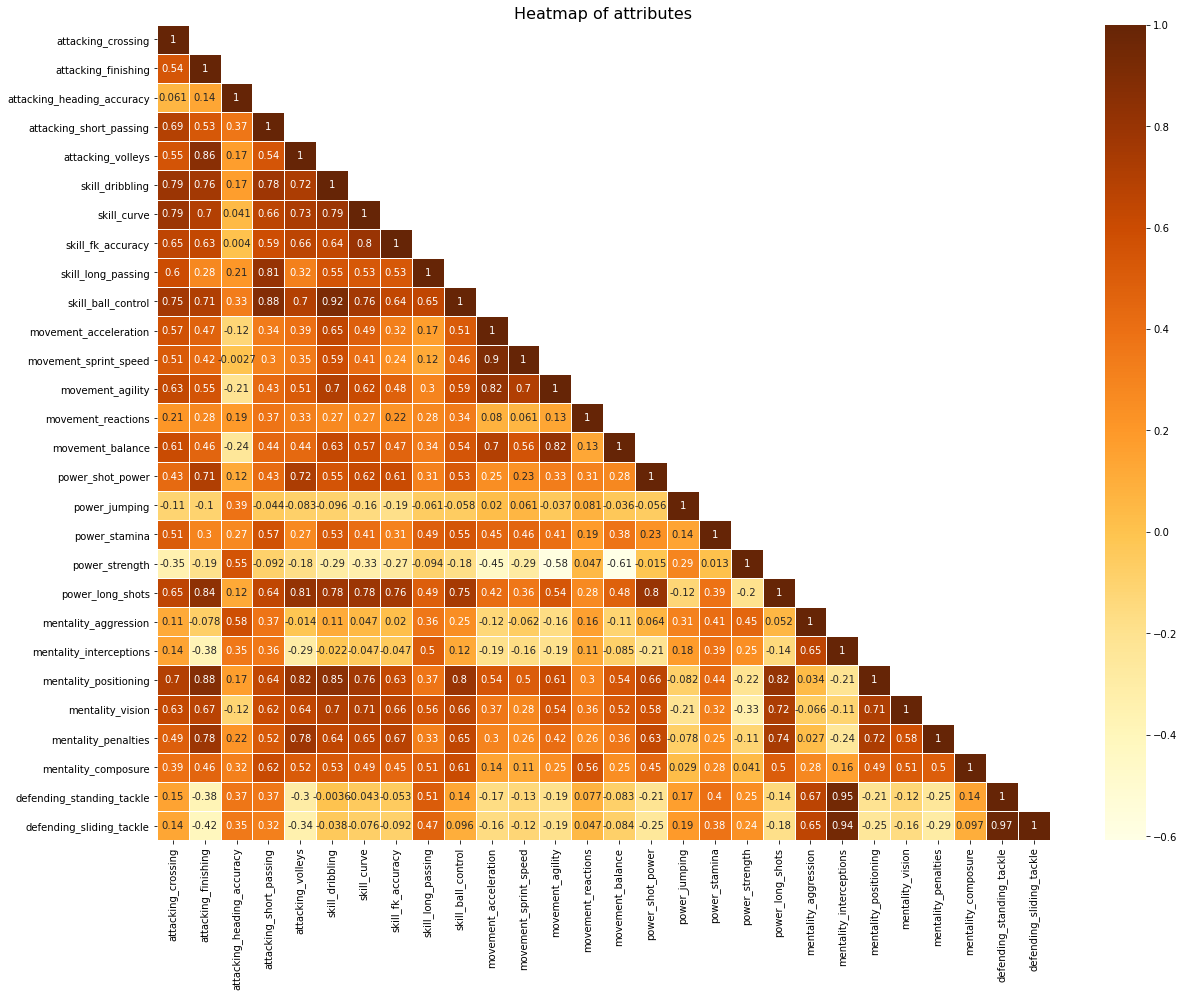

In [21]:
fig = plt.figure(figsize=(20, 15))
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask,k=1)] = True
heat_map = sns.heatmap(corr_mat,annot = True, linewidths=.5, cmap='YlOrBr', mask=mask)
heat_map.set_title(label='Heatmap of attributes', fontsize=16)
plt.show()

In [22]:
skills_ratings = df_skills.columns

In [23]:
df_skills["pos_colors"] = df["player_position"].map(position_colors)

In [24]:
bool_crack = df_overall["overall"] > 85
skill_1 = skills_ratings[2]
skill_2 = skills_ratings[16]
print(skill_1, skill_2)

attacking_heading_accuracy power_jumping


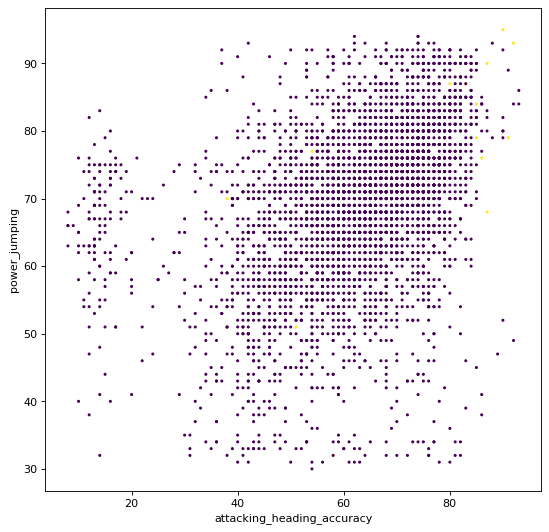

In [25]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2], s=3, c=bool_crack)
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

In [26]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_overall.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker={"size": 5, "color": df_overall["player_position"].map(position_colors)},
                   
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_overall.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=700,height=700)

fig = go.Figure(data=data, layout=layout)

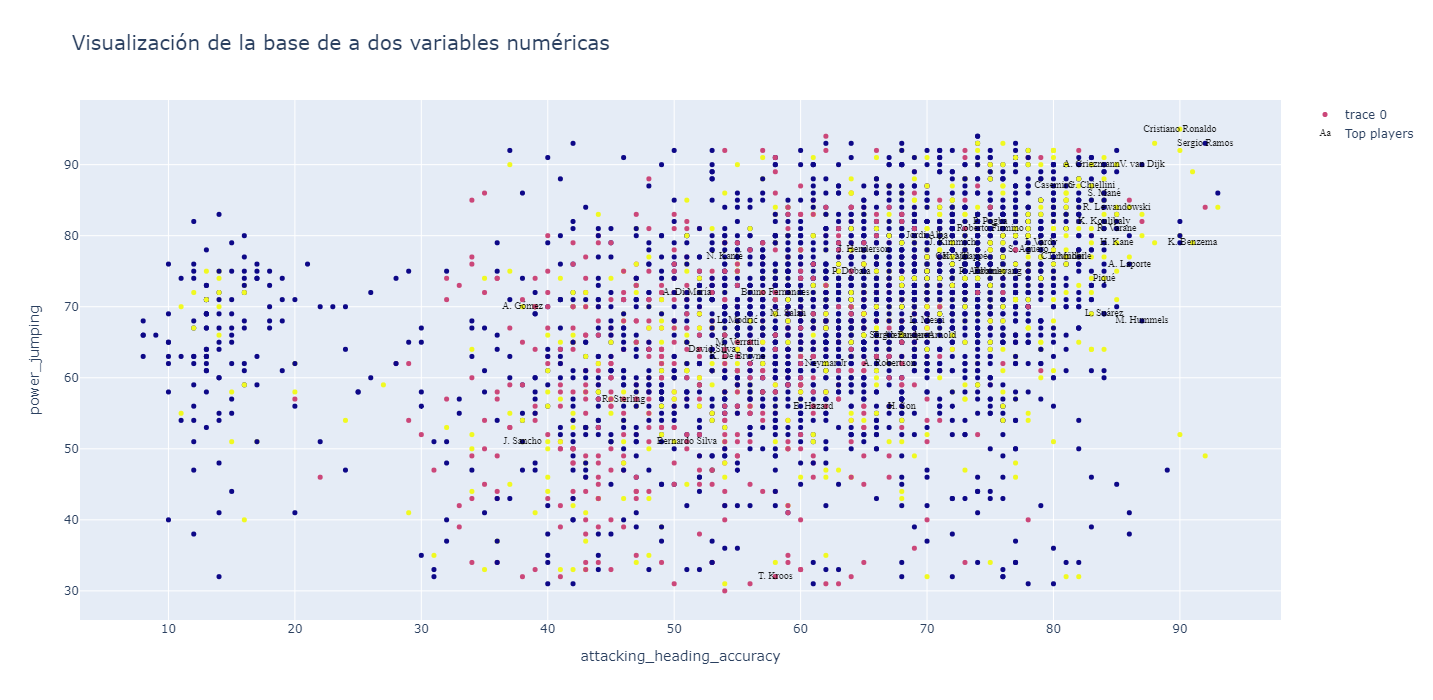

In [27]:
iplot(fig)

## Uso de técnicas de clustering

### K-Means

In [28]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

In [29]:
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(df_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster=Inertia= ', km.inertia_)

Suma de los cuadrados de las distancias al cluster=Inertia=  10146428.926764343


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

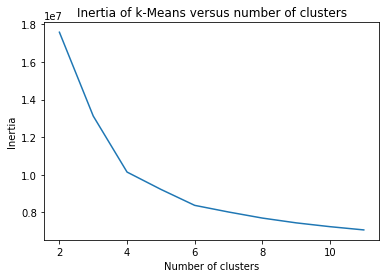

In [30]:
scores = [KMeans(n_clusters=i).fit(df_skills).inertia_ for i in range(2,12)]

plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [31]:
skill_1=skills_ratings[1]
skill_2=skills_ratings[9]
print(skill_1, skill_2)

attacking_finishing skill_ball_control


In [32]:
kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_overall.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color=clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=df_overall.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

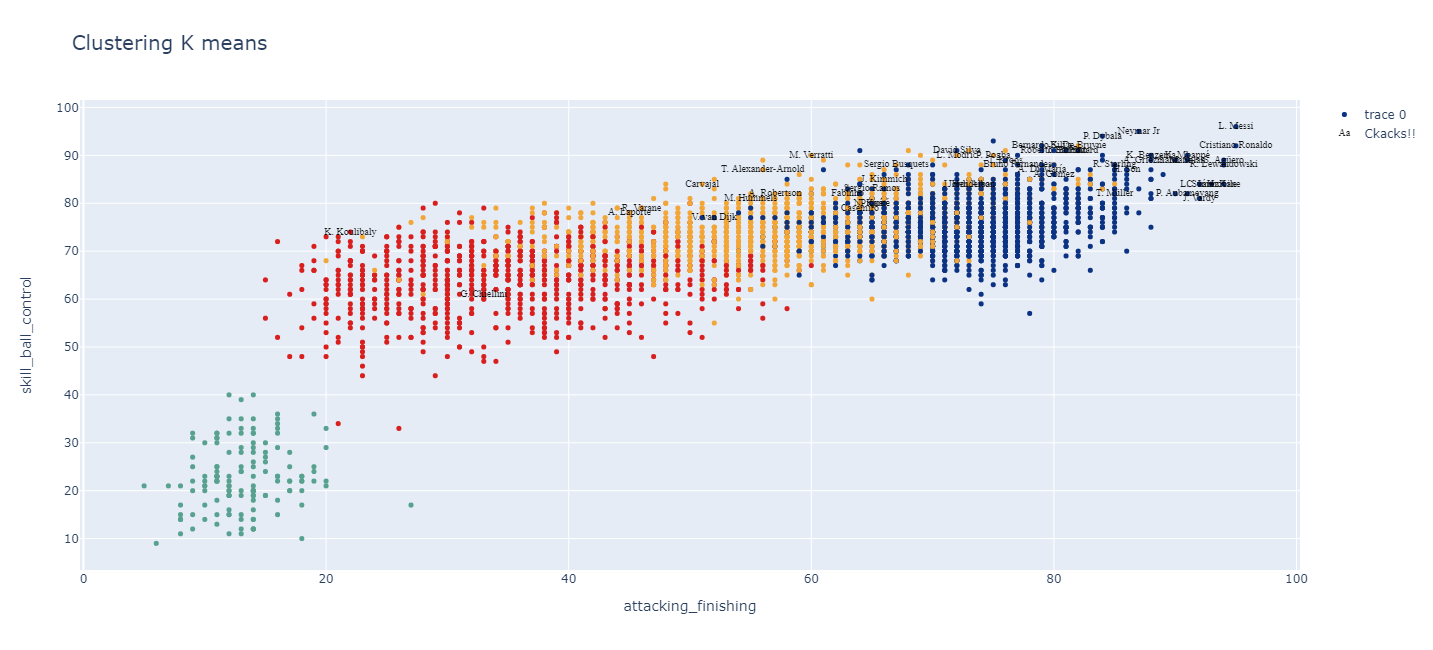

In [33]:
iplot(fig)

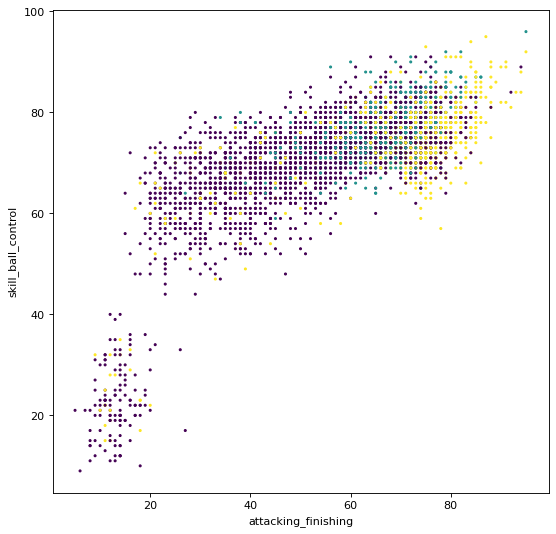

In [34]:
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2], s=3, c=df_overall["player_position"].map(position_colors))
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

### Mean Shift

In [35]:
skill_1=skills_ratings[1]
skill_2=skills_ratings[9]

meanshift_df = df_skills[[skill_1, skill_2]]
print(skill_1, skill_2)

attacking_finishing skill_ball_control


In [36]:
ms = MeanShift(bandwidth=5, bin_seeding=True)

ms.fit(meanshift_df)

clusters2 = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(clusters2)
n_clusters_ = len(labels_unique)

print("Cantidad de clusters encontrados por Mean Shift : %d" % n_clusters_)

Cantidad de clusters encontrados por Mean Shift : 9


In [37]:
MeanShift_clusters = go.Scatter(x=meanshift_df[skill_1], y=meanshift_df[skill_2],
                           mode='markers',
                        text=df_overall.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters2.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack = go.Scatter(x=meanshift_df.loc[bool_crack,skill_1], y=meanshift_df.loc[bool_crack,skill_2],name='Top players',
                      text=df_overall.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[MeanShift_clusters,crack]

layout = go.Layout(title="Mean Shift",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

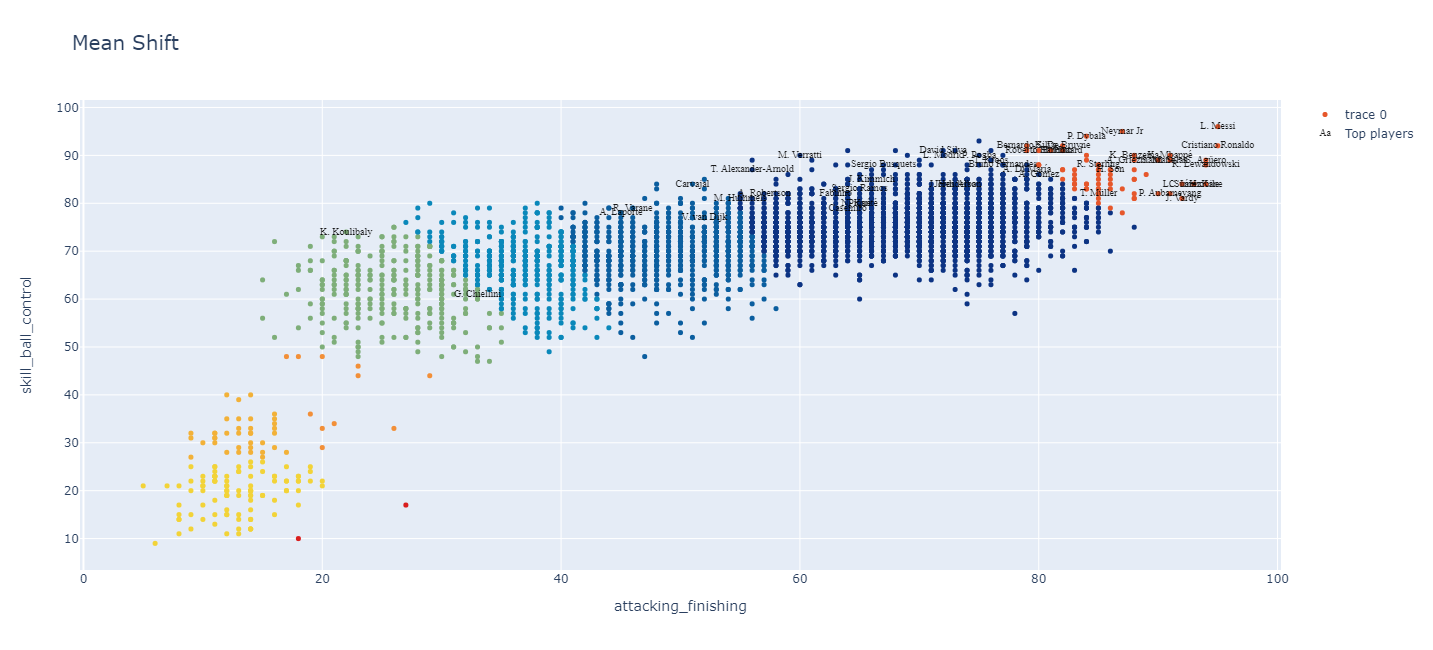

In [38]:
iplot(fig)

### AgglomerativeClustering

In [39]:
from sklearn.cluster import AgglomerativeClustering

clustering =AgglomerativeClustering(n_clusters=4,linkage='average', affinity='manhattan')
clustering.fit(df_skills)
cluster_labels=clustering.labels_
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
skill_1=skills_ratings[1]
skill_2=skills_ratings[9]
print(skill_1, skill_2)

attacking_finishing skill_ball_control


In [41]:
average_linkage_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_overall.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = cluster_labels.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_overall.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[average_linkage_clusters,crack]

layout = go.Layout(title="Average linkage",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

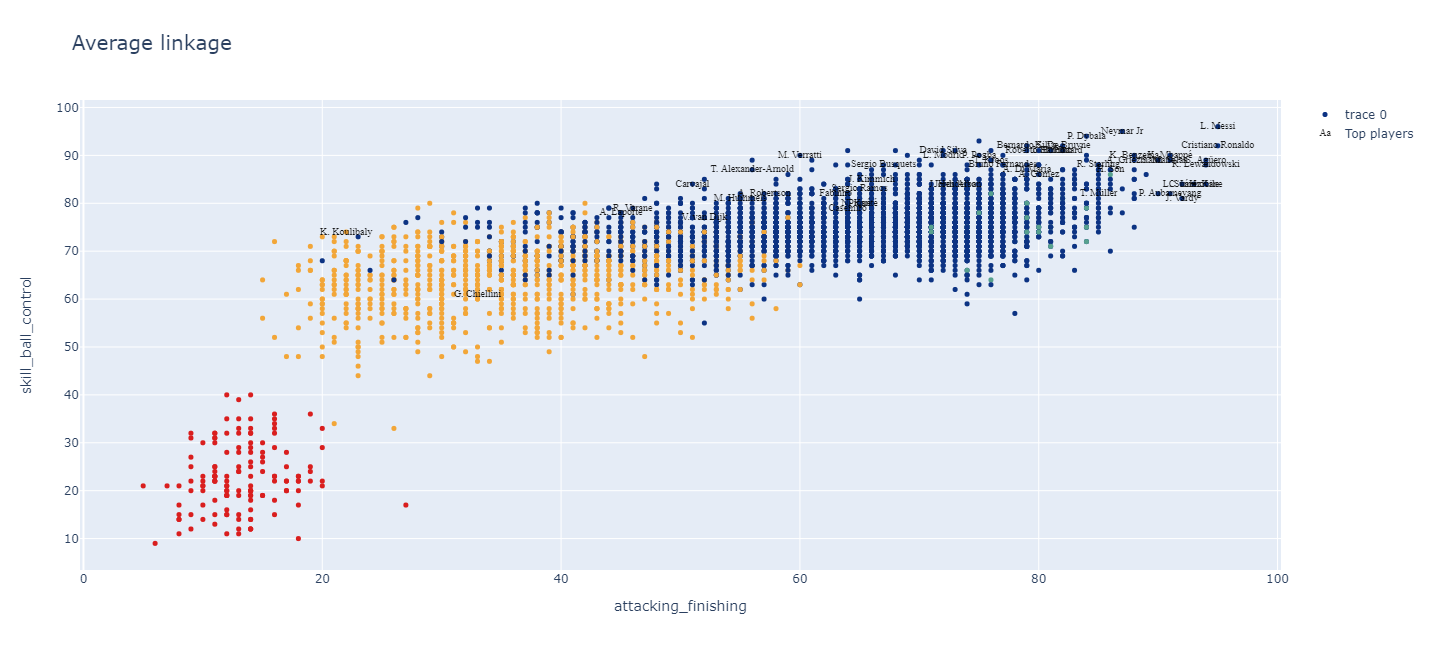

In [42]:
iplot(fig)

## Análisis de técnicas de clustering

Con las variables analizadas al aplicar clustering, podemos interpretar que dadas las columnas seleccionadas, los cluster queda formado por jugadores estrellas en la sección superior derecha del gráfico y luego jugadores de menor categoría. Con un grupo resagado en el sector izquierdo.

En la exploración visual, podemos identificar 2 grupos claros: Un conjunto de datos minoritarios, que parece corresponder con jugadores de menor jerarquía, y un conjunto más homogéneo de jugadores con una correlación con su _overall_ hacia el extremo superior derecho del gráfico.

Dadas las variables seleccionadas, también podemos ver que los jugadores que juegan en sus equipos como atacantes, en general son aquellos que tienen al mismo tiempo capacidad de definición y control de balón. La comparación dentre k-means y el gráfico de posiciones, parece tener una correlación.

Por la alta dimensionalidad de los datos con los que contamos, a continuación haremos un trabajo de embeddings para reducir la dimensionalidad e intentar encontrar clusters más representativos de los datos.

### Embeddings

In [43]:
n_sne=2000  # elegir numero pequeño para agilidad en el cálculo luego
df_sne=df.loc[:n_sne]
X=df_sne[skills_ratings]
print('dimensión del espacio de los datos: ', len(skills_ratings))

dimensión del espacio de los datos:  28


In [44]:
from sklearn import (manifold, decomposition)
X.head(5)

attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  85                   95                          70   
1                  84                   95                          90   
2                  13                   11                          15   
3                  71                   94                          85   
4                  85                   87                          62   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       91                 88               96           93   
1                       82                 86               88           81   
2                       43                 13               12           13   
3                       84                 89               85           79   
4                       87                 87               95           88   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0                 94                  91                  96   
1                 76                  77                  92   
2                 14                  40                  30   
3                 85                  70                  88   
4                 89                  81                  95   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0                     91                     80                91   
1                     87                     91                87   
2                     43                     60                67   
3                     77                     78                77   
4                     94                     89                96   

   movement_reactions  movement_balance  power_shot_power  power_jumping  \
0                  94                95                86             68   
1                  95                71                94             95   
2                  88                49                59             78   
3                  93                82                89             84   
4                  91                83                80             62   

   power_stamina  power_strength  power_long_shots  mentality_aggression  \
0             72              69                94                    44   
1             84              78                93                    63   
2             41              78                12                    34   
3             76              86                85                    81   
4             81              50                84                    51   

   mentality_interceptions  mentality_positioning  mentality_vision  \
0                       40                     93                95   
1                       29                     95                82   
2                       19                     11                65   
3                       49                     94                79   
4                       36                     87                90   

   mentality_penalties  mentality_composure  defending_standing_tackle  \
0                   75                   96                         35   
1                   84                   95                         32   
2                   11                   68                         12   
3                   88                   88                         42   
4                   92                   93                         30   

   defending_sliding_tackle  
0                        24  
1                        24  
2                        18  
3                        19  
4                        29

In [45]:
%%time

from sklearn import (manifold, decomposition)

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1960 samples in 0.000s...
[t-SNE] Computed neighbors for 1960 samples in 0.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1960
[t-SNE] Computed conditional probabilities for sample 1960 / 1960
[t-SNE] Mean sigma: 13.031156
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.726524
[t-SNE] KL divergence after 1000 iterations: 1.285399
Wall time: 8.45 s


In [46]:
data=[]
bool_crack=df_sne["overall"] > 85 #diferenciamos a los mejores jugadores

#graficamos los datos en el espacio transformado: las dos componentes tsne

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_sne.loc[:,'team_position'], #'Height', 'Weight', 'Club', 'Age', 'Name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Los más mejores',
                      text=df_sne.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)

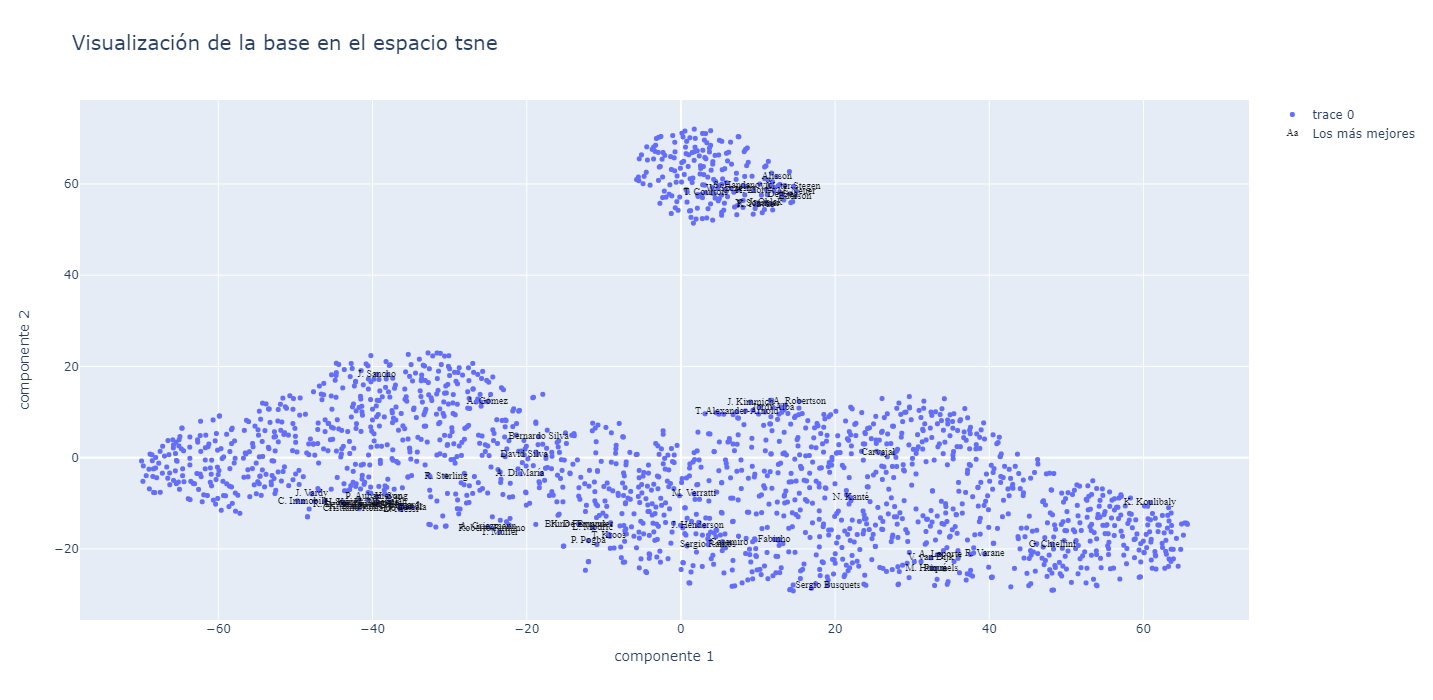

In [47]:
iplot(fig)

In [48]:
forwards=['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW']
midfielders=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
defenders=['RCB','CB','LCB','LB','RB','RWB','LWB']
goalkeepers=['GK']

def pos2(position):
    if position in forwards:
        return 'Forward'
    
    elif position in midfielders:
        return 'Midfielder'
    
    elif position in defenders:
        return 'Defender'
    
    elif position in goalkeepers:
        return 'GK'
    
    else:
        return 'nan'

In [49]:
df_sne["team_position2"]=df_sne["team_position"].apply(lambda x: pos2(x))
df_sne["team_position2"].value_counts()

nan           661
Defender      397
Forward       396
Midfielder    355
GK            151
Name: team_position2, dtype: int64

In [50]:
bool_striker= df_sne["team_position2"] == 'Forward'
bool_midfielder= df_sne["team_position2"] == 'Midfielder'
bool_defender= df_sne["team_position2"] == 'Defender'
bool_gk= df_sne["team_position2"] == 'GK'

bool_crack=df_sne["overall"] > 85

palette=['navy','red','#A2D5F2','orange','green','pink']  
data=[]

striker =go.Scatter(x=X_tsne[bool_striker,0], y=X_tsne[bool_striker,1],name='Striker',
                      text=df_sne.loc[bool_striker,'short_name'],
                      opacity=0.9,marker=dict(color=palette[2],size=5),mode='markers')

midfielder =go.Scatter(x=X_tsne[bool_midfielder,0], y=X_tsne[bool_midfielder,1],name='Midfielder',
                      text=df_sne.loc[bool_midfielder,'short_name'],
                      opacity=0.6,marker=dict(color=palette[1],size=5),mode='markers')

defender =go.Scatter(x=X_tsne[bool_defender,0], y=X_tsne[bool_defender,1],name='Defender',
                      text=df_sne.loc[bool_defender,'short_name'],
                      opacity=0.7,marker=dict(color=palette[3],size=5),mode='markers')

gk =go.Scatter(x=X_tsne[bool_gk,0], y=X_tsne[bool_gk,1],name='GK',
                      text=df_sne.loc[bool_gk,'short_name'],
                      opacity=0.4,marker=dict(color=palette[4],size=5),mode='markers')

crack =go.Scatter(x=X_tsne[bool_crack,0], y=X_tsne[bool_crack,1],name='Top player',
                      text=df_sne.loc[bool_crack,'short_name'],textfont=dict(family='sans serif',color='black',size=16),
                      opacity=0.9,mode='text')

data=[striker,midfielder,defender,gk,crack]

layout = go.Layout(title="t-SNE - Fifa Players",titlefont=dict(size=20),
                autosize=False, width=1150,height=750)

fig = go.Figure(data=data, layout=layout)

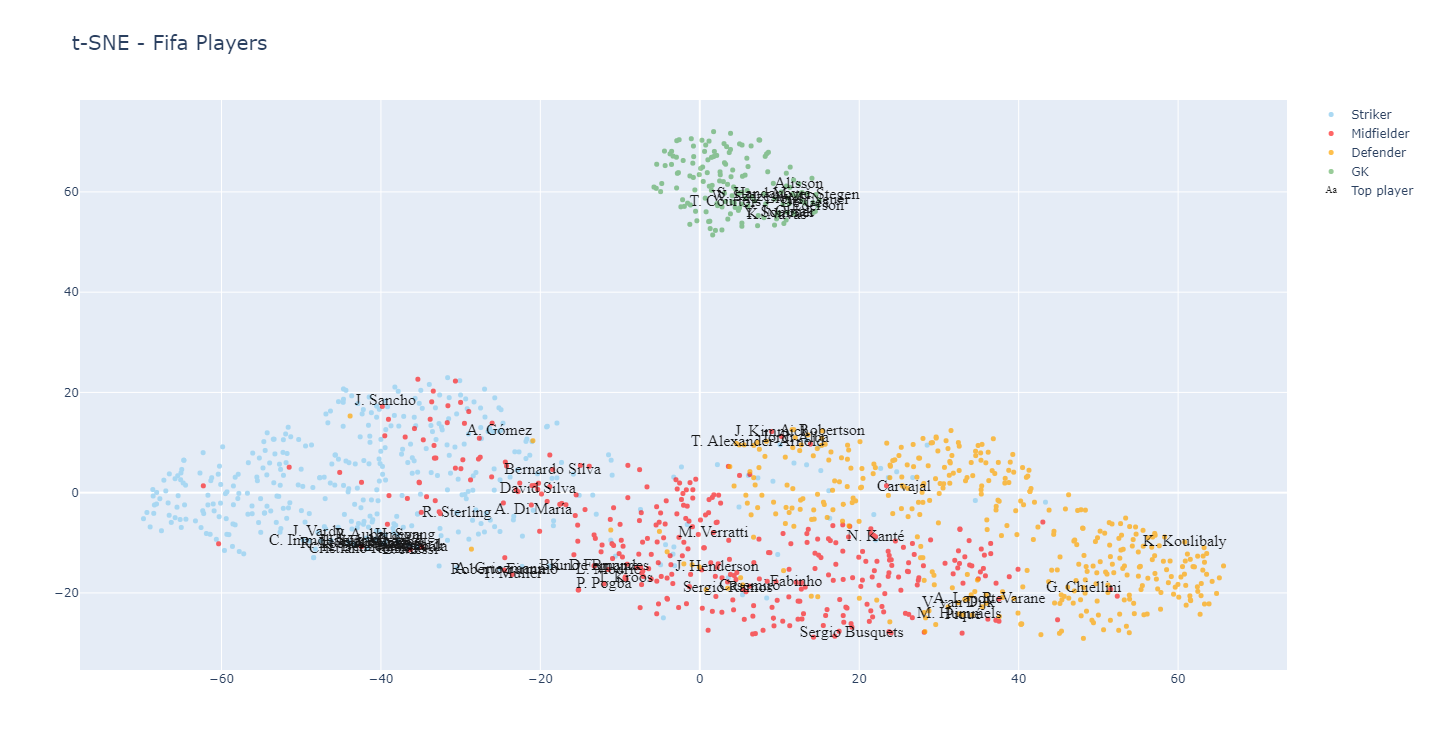

In [51]:
iplot(fig)

In [52]:
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(X_tsne)

# Recuperacion de etiquetas
clusters = km.labels_

In [53]:
kmean_clusters = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=df_overall.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color=clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

data=kmean_clusters

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                #xaxis=dict(title=skill_1),
                #yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

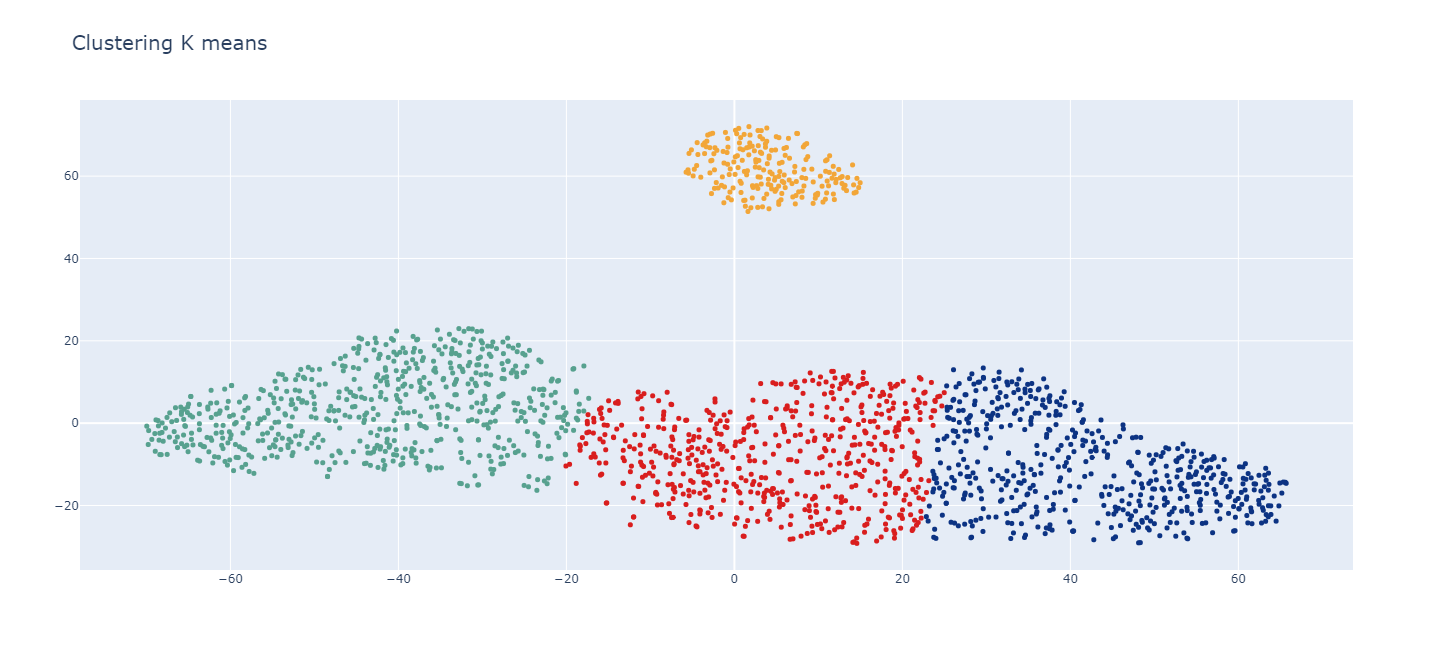

In [54]:
iplot(fig)

### Análisis de métodos de embedding

En este caso, podemos ver información mucho mas interesante. Principalmente, vemos grupos más identificables, y al intentar interpretar los datos obtenidos, podemos encontrar mayor correlación con la realidad.

Lo primero que puede notarse es que parece haber sectores definidos según las posiciones donde los jugadores se desempeñan en sus equipos. A pesar de que la reducción de dimensiones afecta la interpretabilidad, también podemos encontrar gracias al clustering estos sectores; y probablemente sus límites sean útiles a la hora de predecir, por ejemplo, la mejor ubicación en la cancha para cierto jugador.

# Conclusiones
- Los métdos de clustering son de gran utilidad para ayudar en la exploración de los datos.
- La interpretabilidad de los resultados puede ser subjetiva y es importante el conocimiento del dominio a la hora de tomar conclusiones sobre los mismos.
- Los métodos de reducción de dimensionalidad son importantes, entre otras cosas, para la visualización de datos de alta dimensionalidad. Es importante conocer su funcionamiento y limitaciones si sus resultados van a ser la fuente de próximos procesamientos.